### Επιλογή χαρακτηριστικών

* Είναι απαραίτητη για τον εντοπισμό και την απομόνωση του βέλτιστου υποσυνόλου χαρακτηριστικών μέσα από ένα πολυδιάστατο σύνολο δεδομένων. 

* Χρησιμοποιείται ευρέως για εφαρμογές μηχανικής μάθησης σε τομείς οι οποίοι χαρακτηρίζονται από σύνολα δεδομένων μεγάλων διαστάσεων (π.χ: ιατρική, βιολογία, κλπ).

* Υπάρχουν πολλές διαφορετικές μέθοδοι επιλογής χαρακτηριστικών που ανήκουν σε τρεις μεγάλες κατηγορίες

  - Mέθοδοι φίλτρου (filter based): Οι μέθοδοι φίλτρου συνήθως χρησιμοποιούνται κατά την προ επεξεργασία των δεδομένων. Η επιλογή χαρακτηριστικών είναι ανεξάρτητη από οποιονδήποτε αλγόριθμο μηχανικής μάθησης. Τα χαρακτηριστικά επιλέγονται με βάση την βαθμολογία που λαμβάνουν σε συγκεκριμένους στατιστικούς ελέγχους οι οποίοι μετρούν την συσχέτιση κάθε χαρακτηριστικού με την μεταβλητή εξόδου (response variable).

  - Περιβάλλουσες μέθοδοι (wrapper based):  χρησιμοποιείται ένα υποσύνολο χαρακτηριστικών για εκπαίδευση ενός αλγορίθμου μηχανικής μάθησης. Με βάση τα αποτελέσματα της εκπαίδευσης, είτε προστίθενται είτε αφαιρούνται χαρακτηριστικά από το
υποσύνολο που χρησιμοποιείται. Το πρόβλημα πλέον είναι τύπου αναζήτησης. Οι περιβάλλουσες μέθοδοι έχουν μεγαλύτερο υπολογιστικό κόστος σε σχέση με τις filter based μεθόδους.

  - Ενσωματωμένες μέθοδοι (embedded methods): πρόκεται για τεχνικές οι οποίες εκτελούν επιλογή χαρακτηριστικών κατά την διάρκεια εκπαίδευσης ενός μοντέλου μηχανικής μάθησης. Θεωρούνται "ενσωματωμένες" διότι αποτελούν αναπόσπαστα κομμάτια συγκεκριμένων μοντέλων μηχανικής μάθησης (π.χ: το feature importance στα decision trees όπου η σημαντικότητα κάθε χαρακτηριστικού έχει να κάνει με το πώς αυτό χρησιμοποιείται έτσι ώστε να γίνει κόψιμο σε έναν κόμβο του δένδρου απόφασης).

In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Δέντρα απόφασης (decision trees)

* Τα δένδρα απόφασης (decision trees), είναι μια κατηγορία αλγορίθμων επιβλεπόμενης μηχανικής μάθησης. Μπορούν να χρησιμοποιηθούν τόσο για ταξινόμηση (classification) όσο και για παλινδρόμηση (regression). Βασικό χαρακτηριστικό τους είναι η δημιουργία ενός μοντέλου εκπαίδευσης το οποίο μπορεί να κάνει προβλέψεις σχετικά με την τιμή μιας μεταβλητής ενδιαφέροντος (είτε κατηγορικής είτε αριθμητικής), μέσω απλών κανόνων απόφασης που έχουν προκύψει από τα δεδομένα εκπαίδευσης (training dataset) επιβλεπόμενης μάθησης.

* Λόγω των κανόνων απόφασης που ”παράγουν” είναι πιο εύκολο να ερμηνευθούν οι απαντήσεις/λύσεις ενός δένδρου απόφασης σε σχέση με άλλα μοντέλα μηχανικής μάθησης (πχ: νευρωνικά δίκτυα πολλών στρωμάτων). Σε κάποιες περιπτώσεις, ένα δένδρο από-
φασης δεν δίνει μια ξεκάθαρη λύση/απάντηση. Αντί για αυτό, μπορεί να δίνει κανόνες απόφασης τους οποίους θα μπορεί να αξιοποιήσει ο εκάστοτε εξειδικευμένος επιστήμονας για να δώσει μια εμπεριστατωμένη απάντηση σε ένα πρόβλημα


![decision_tree.svg](./images/decision_tree.svg)

### Μέθοδοι συνόλων (ensemble methods)

* Οι μέθοδοι συνόλων (ensemble methods), είναι τεχνικές μέσω των οποίων συνδυάζονται μοντέλα μηχανικής μάθησης έτσι ώστε να λειτουργούν ως ένα ενιαίο μοντέλο το οποίο θα κάνει καλύτερες προβλέψεις. Mέσω των τεχνικών αυτών παράγονται ”συνολικά” μοντέλα τα οποία ξεπερνούν σε απόδοση τα επιμέρους μοντέλα από τα οποία αποτελούνται.

* Τα ”συνολικά” (ensemble) μοντέλα τείνουν να είναι πιο ευέλικτα (λιγότερη προκατάληψη (bias) καθώς πρόκειται για συνδυασμό διαφορετικών μοντέλων) και λιγότερο ευαίσθητα σε δεδομένα (παρουσιάζουν μικρότερη διακύμανση (variance)).


* Bagging: Εκπαιδεύονται παράλληλα πολλά διαφορετικά μοντέλα μηχανικής μάθησης (κάθε ένα σε ένα διαφορετικό υποσύνολο του συνόλου δεδομένων). Το bagging, χρησιμοποιείται από τον Random Forest, όπου συνδυάζονται παράλληλα δένδρα απόφασης καθένα από τα οποία έχει εκπαιδευτεί σε διαφορετικό υποσύνολο του ίδιου συνόλου δεδομένων. Στην συνέχεια υπολογίζεται ο μέσος όρος των αποτελεσμάτων κάθε δένδρου έτσι ώστε να προκύψει η τελική πρόβλεψη.

![bagging.svg](./images/bagging.svg)

* Boosting: Βασίζεται στην ιδέα ότι τα λάθη ενός μοντέλου που ανήκει στο σύνολο (ensemble), θα αναγνωριστούν και θα αποφευχθούν από το επόμενο κατά σειρά μοντέλο του συνόλου (σειριακή λειτουργία). Χρησιμοποιούνται ”αδύναμα” μοντέλα μηχανικής μάθησης, δηλαδή μοντέλα που αποδίδουν λίγο καλύτερα από μια τυχαία πιθανότητα. Το boosting χρησιμοποιείται ευρέως καθώς επιτρέπει τον συνδυασμό πολλών διαφορετικών ”αδύναμων” μοντέλων ανεξάρτητα από τον τρόπο λειτουργίας τους.

![boosting.svg](./images/boosting.svg)

* Gradient boosting: Συνδυάζει boosting με gradient descent. Χρησιμοποιεί μια συνάρτηση σφάλματος έτσι ώστε να ελαχιστοποιηθεί το σφάλμα και να υπάρξει σύγκλιση σε μια τελική τιμή εξόδου. Η ελαχιστοποίηση της συνάρτησης σφάλ-
ματος επιτυγχάνεται μέσω του αλγορίθμου της καθόδου βασισμένη στην κλίση (gradient descent).


In [3]:
# Function to assign a rank to each element in a list with the first element being the most important.
def rank_list(lst:list)->dict:
    # Returns a dictionary comprehension where each list element is a key and its rank is a value.
    # The rank is calculated as the length of the list minus one minus the element's index.
    return {elm:len(lst) - 1 - i for i, elm in enumerate(lst)}

# Function to perform Borda count aggregation for a list of ranked lists.
def borda_aggregation(loflists: list[list]) -> dict:
    # Convert each individual list into a dictionary of ranks.
    list_ranks = [rank_list(l) for l in loflists]
    # Create a set of all unique elements across all the lists.
    feature_set = {i for i in [el for nl in loflists for el in nl]}
    # Return a dictionary where each element's score is the sum of its ranks across all the lists.
    return {e:sum([lr.get(e, 0) for lr in list_ranks]) for e in feature_set}

# Function to create a sorted DataFrame from a dictionary of results.
def create_sorted_df(result:dict):
    # Create a DataFrame from the dictionary.
    df = pd.DataFrame(list(result.items()), columns=['Feature', 'Borda Rank'])
    # Sort the DataFrame based on the 'Borda Rank' column in descending order.
    df.sort_values(by='Borda Rank', ascending=False, inplace=True)
    # Reset the DataFrame's index and drop the old index.
    df.reset_index(drop=True, inplace=True)
    # Return the sorted DataFrame.
    return df

# Function to create a DataFrame from a list of lists using Borda count aggregation.
def borda_df(loflists: list[list]):
    # Aggregate the lists into a Borda count dictionary.
    borda_dict = borda_aggregation(loflists)
    # Create and return a sorted DataFrame from the Borda count dictionary.
    return create_sorted_df(borda_dict)

# Function to create a DataFrame showing the importance of features from a model.
def feature_importance_df_creation(model, model_label, feature_names):
    # Create a DataFrame from the model's feature importances.
    importance_df = pd.DataFrame(model.feature_importances_)
    # Rename the column to the provided model label.
    importance_df = importance_df.rename(columns= {0: model_label})
    # Add the feature names as a column in the DataFrame.
    importance_df["feature_name"] = feature_names
    # Sort the DataFrame based on the importance scores in descending order.
    importance_df = importance_df.sort_values(by=model_label, ascending=False)
    # Return the sorted DataFrame.
    return importance_df

### Συστήματα ψηφοφορίας (voting schemes)

* Μπορούμε να συνδυάσουμε τις λίστες σημαντικότερων χαρακτηριστικών μέσω συστημάτων ψηφοφορίας (voting schemes).

* Borda rank based count: Πρόκειται για ένα σύστημα ψηφοφορίας όπου κάθε ταξινομητής/ειδικός (expert), κατατάσσει στοιχεία/υποψηφίους με βάση κάποιο κριτήριο. Εάν πρόκειται για τιμές εξόδου τότε αυτές κατατάσσονται με βάση την πιθανότητα τους να είναι σωστές. Εάν πρόκειται για χαρακτηριστικά/στήλες, τότε αυτές κατατάσσονται με βάση την σημαντικότητα τους (με βάση την συνάρτηση σημαντικότητας που χρησιμοποιείται
από τον εκάστοτε ταξινομητή).

* Σε κάθε στοιχείο δίνεται ένας βαθμός/τάξη (rank) ο οποίος παίρνει τιμές από m-1 (πρώτης τάξης στοιχείο) έως 0 (τελευταίας τάξης στοιχείο) όπου m, το συνολικό πλήθος στοιχείων.

* Στην συνέχεια υπολογίζεται το άθροισμα των τάξεων που έχει λάβει κάθε στοιχείο από τον κάθε επιμέρους ταξινομητή. Τα στοιχεία πλέον ταξινομούνται με βάση τον αθροιστικό βαθμό/τάξη τους. Σε περίπτωση ισοπαλίας μεταξύ δύο ή παραπάνω στοιχείων με μέγιστο αθροιστικό βαθμό/τάξη, γίνεται τυχαία επιλογή. 

* Δημιουργήθηκε από έναν Γάλλο πολιτικό, τον Jean-Claude Borda ο οποίος ήθελε να δημιουργήσει ένα πραγματικά δημοκρατικό εκλογικό σύστημα. Σήμερα χρησιμοποιείται για εκλογές στην Σλοβενία.

![borda_rank_count.svg](./images/borda_rank_count.svg)

In [4]:
df = pd.read_csv("./data/uci_heart_failure/uci_hf_df.csv")

tag = pd.DataFrame(df, columns=["tag"])
df = df.drop(columns=['tag'])

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
293,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
294,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
295,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [6]:
tag

,tag
0,0
1,1
2,1
3,0
4,0
...,...
292,1
293,1
294,1
295,1


In [7]:
xgbclass = XGBClassifier(eval_metric='logloss', verbosity = 0, importance_type='gain', silent=True)
cbc = CatBoostClassifier(iterations=100, verbose=0)
lgbm = LGBMClassifier(importance_type='split')

In [8]:
xgbclass.fit(df, tag["tag"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [9]:
cbc.fit(df, tag["tag"])

In [10]:
lgbm.fit(df, tag["tag"])

[LightGBM] [Info] Number of positive: 137, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 297, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461279 -> initscore=-0.155193
[LightGBM] [Info] Start training from score -0.155193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [11]:
xgb_importance = feature_importance_df_creation(xgbclass, "XgBoost_importance", list(df.columns))
cbc_importance = feature_importance_df_creation(cbc, "CatBoost_importance", list(df.columns))
lgbm_importance = feature_importance_df_creation(lgbm, "LightGBM_importance", list(df.columns))

In [12]:
xgb_importance

,XgBoost_importance,feature_name
12,0.280270,thal
2,0.190088,cp
11,0.120128,ca
8,0.091346,exang
1,0.043225,sex
9,0.041005,oldpeak
10,0.039266,slope
0,0.036721,age
3,0.034766,trestbps
6,0.033415,restecg


In [13]:
xgboost_imp_lst = list(xgb_importance["feature_name"])
catboost_imp_lst = list(cbc_importance["feature_name"])
lgbm_imp_lst = list(lgbm_importance["feature_name"])

In [14]:
xgboost_imp_lst

['thal',
 'cp',
 'ca',
 'exang',
 'sex',
 'oldpeak',
 'slope',
 'age',
 'trestbps',
 'restecg',
 'thalach',
 'fbs',
 'chol']

In [15]:
borda_results = borda_df([xgboost_imp_lst, catboost_imp_lst, lgbm_imp_lst])
borda_results

,Feature,Borda Rank
0,thal,29
1,ca,29
2,cp,26
3,age,24
4,oldpeak,24
5,thalach,16
6,slope,16
7,trestbps,15
8,sex,15
9,restecg,13


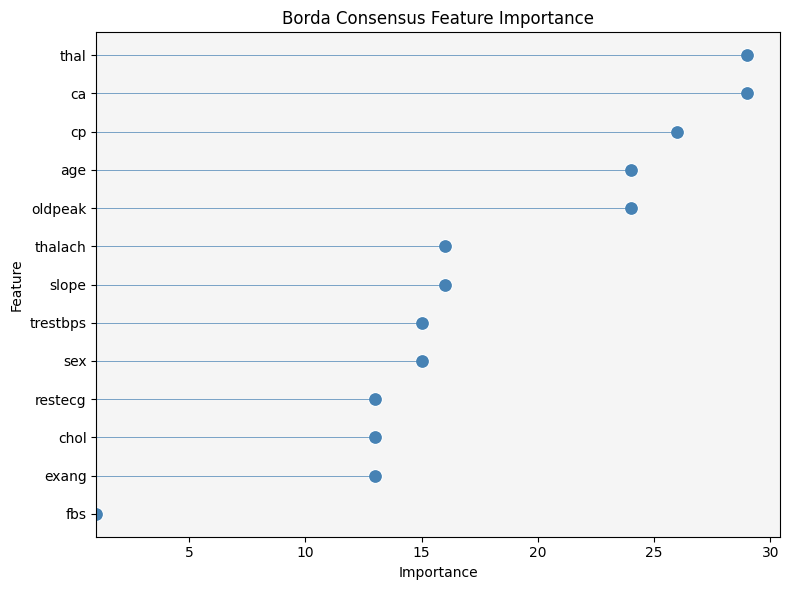

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=borda_results, x="Borda Rank", y="Feature", s=100, color="steelblue", label=" ")
x_start = borda_results["Borda Rank"].min()
ax.set_xlim(left=x_start)
ax.set_facecolor("whitesmoke")
for _, row in borda_results.iterrows():
    ax.plot([x_start, row["Borda Rank"]], [row["Feature"], row["Feature"]], color="steelblue", linewidth=0.5)
ax.set_title("Borda Consensus Feature Importance")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
ax.legend_.remove()
plt.tight_layout()
# plt.savefig("./figures/borda_feature_impotance.pdf", bbox_inches="tight")
plt.show()